<a href="https://colab.research.google.com/github/gnovack/keras-preprocessing/blob/master/colab/CenterCrop_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
BATCH_SIZE = 32
CROP_HEIGHT = 250
CROP_WIDTH = 250

In [82]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
data_generator = image_generator.flow_from_directory(directory=str('data'),
                                                     batch_size=10,
                                                     shuffle=True,
                                                     target_size=(500, 640))

Found 10 images belonging to 2 classes.


In [0]:
#Create a model with a single CenterCrop layer
center_crop_layer = tf.keras.layers.experimental.preprocessing.CenterCrop(CROP_HEIGHT,CROP_WIDTH)
model = tf.keras.models.Sequential([center_crop_layer])

uncropped_batch, _ = next(data_generator)
cropped_images = model.predict(data_generator)

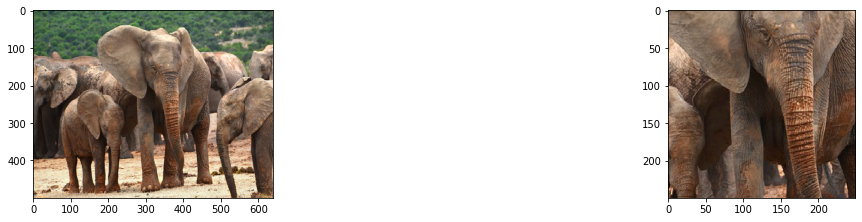

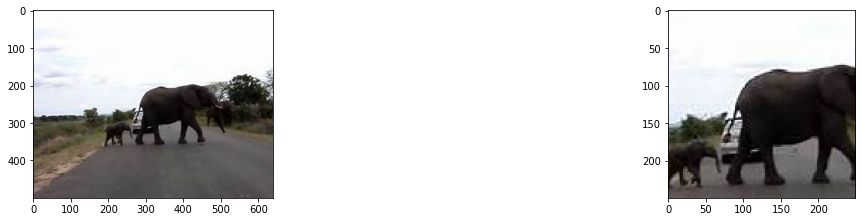

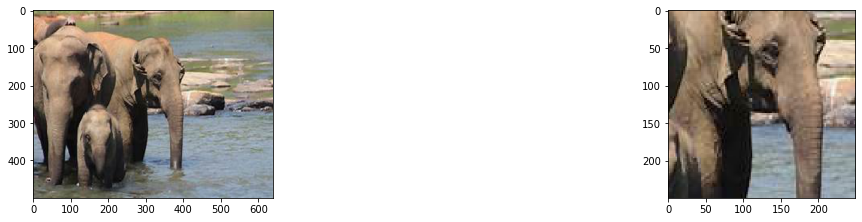

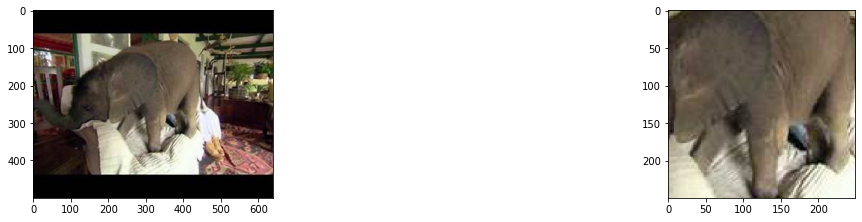

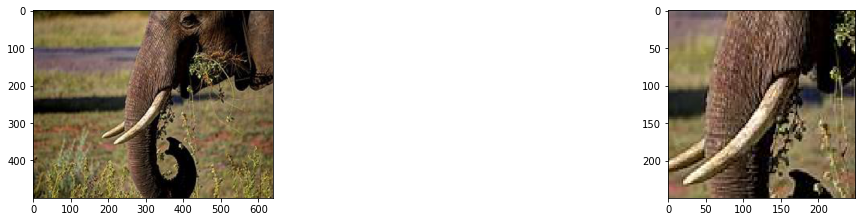

In [84]:
#Show cropped and uncropped images side-by-side
for i in range(0,10,2):
    plt.figure(figsize=(20,20))
    plt.subplot(5,2,i+1)
    plt.imshow(uncropped_batch[i])
    plt.subplot(5,2,i+2)
    plt.imshow(cropped_images[i])

plt.show()